# IMPORTS

In [37]:
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Preprocessing

In [2]:
training_data=pd.read_csv('./data/Mall_Customers.csv')

In [23]:
training_data=training_data.drop(columns=['CustomerID'])

In [24]:
training_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [25]:
training_data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [26]:
train=training_data.apply(LabelEncoder().fit_transform)
data,labels=train.values,train.columns

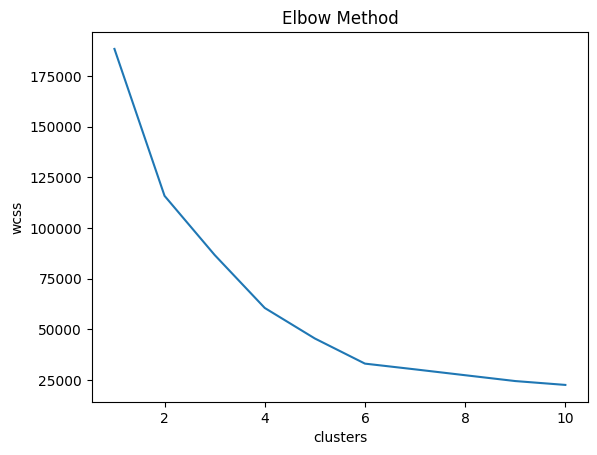

In [27]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", random_state=42)
    km.fit(data)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()


# K-means clustering algorithm

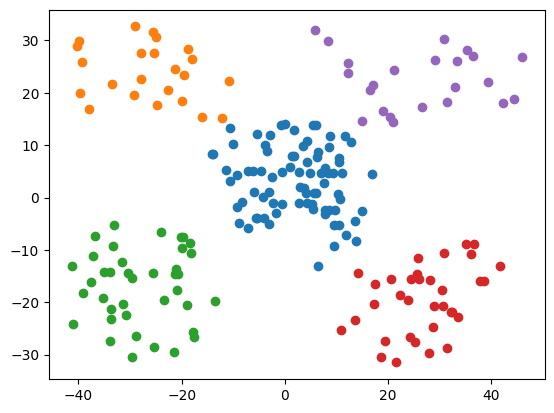

In [30]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=5)
kmeans.fit(reduced_data)
kmeans_results=kmeans.predict(reduced_data)
kmeans_clusters = unique(kmeans_results)
for cluster in kmeans_clusters:
    index = where(kmeans_results == cluster)
    plt.scatter(reduced_data[index, 0], reduced_data[index, 1])
plt.show()

# BIRCH algorithm

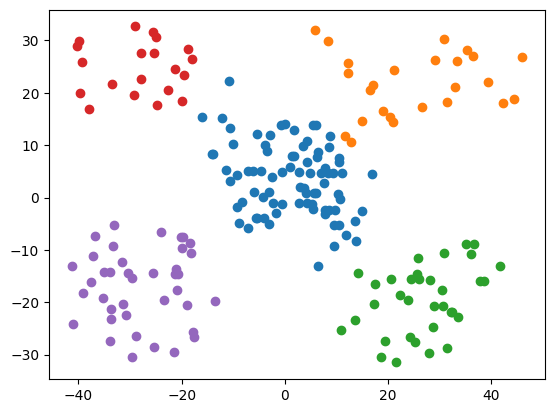

In [36]:
reduced_data = PCA(n_components=2).fit_transform(data)
Birch = Birch(n_clusters=5)
Birch.fit(reduced_data)
Birch_results=Birch.predict(reduced_data)
Birch_clusters = unique(Birch_results)
for cluster in Birch_clusters:
    index = where(Birch_results == cluster)
    plt.scatter(reduced_data[index, 0], reduced_data[index, 1])
plt.show()

# Rock algorithm

In [38]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.rock import rock

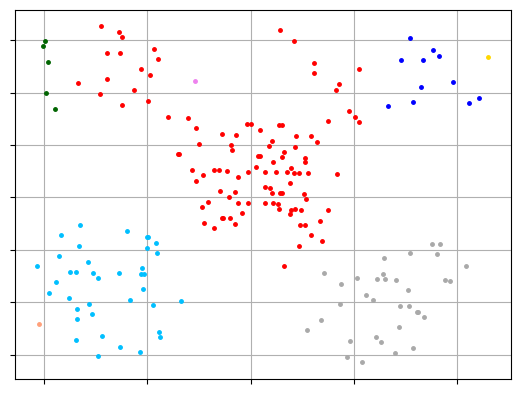

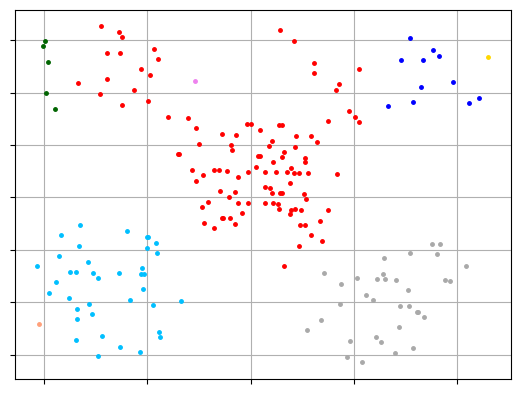

In [65]:

rock_instance = rock(reduced_data, 6.0, 5)
# Run cluster analysis.
rock_instance.process()
# Obtain results of clustering.
clusters = rock_instance.get_clusters()

# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, reduced_data)
visualizer.show()


# Cure algorithm

In [83]:
temp=list(reduced_data)
temp=[list(i) for i in temp]


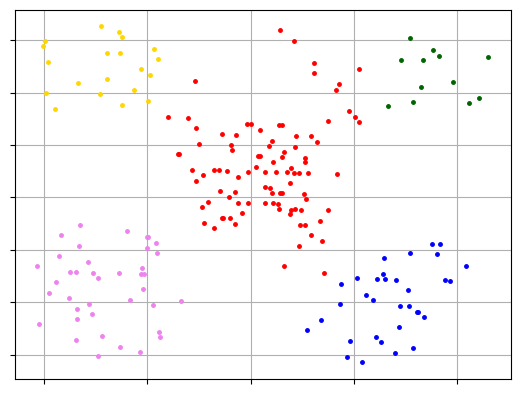

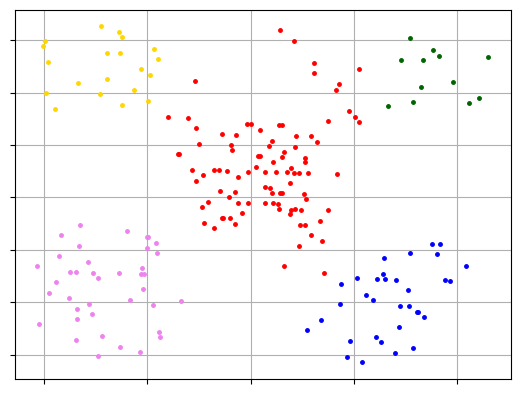

In [88]:
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;

# Input data in following format [ [0.1, 0.5], [0.3, 0.1], ... ].
input_data = temp

# Allocate three clusters.
cure_instance = cure(input_data, 5)
cure_instance.process()
clusters = cure_instance.get_clusters()

# Visualize allocated clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, input_data)
visualizer.show()


# Dbscan

In [51]:
from sklearn.cluster import DBSCAN

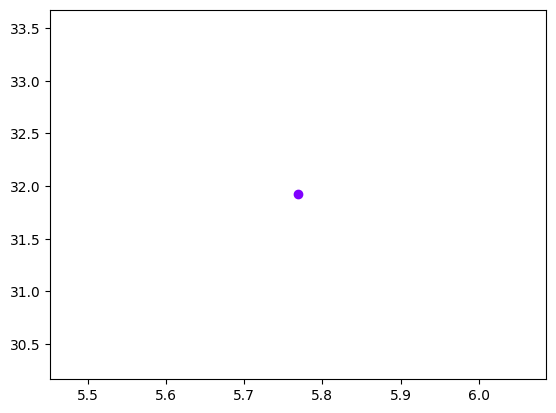

In [59]:
model = DBSCAN(eps=0.3, min_samples=5)
y_labels = model.fit_predict(reduced_data)
plt.scatter(reduced_data[0][0], reduced_data[0][1], c=5, cmap='rainbow')

# Denclue

# Chameleon